In [1]:
from qiskit import *

In [2]:


%matplotlib inline
from qiskit.tools.visualization import plot_histogram



In [3]:
secretNumber = '10101010100'

In [4]:
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))

index0 is 0
index1 is 0
index2 is 1
index3 is 0
index4 is 1
index5 is 0
index6 is 1
index7 is 0
index8 is 1
index9 is 0
index10 is 1


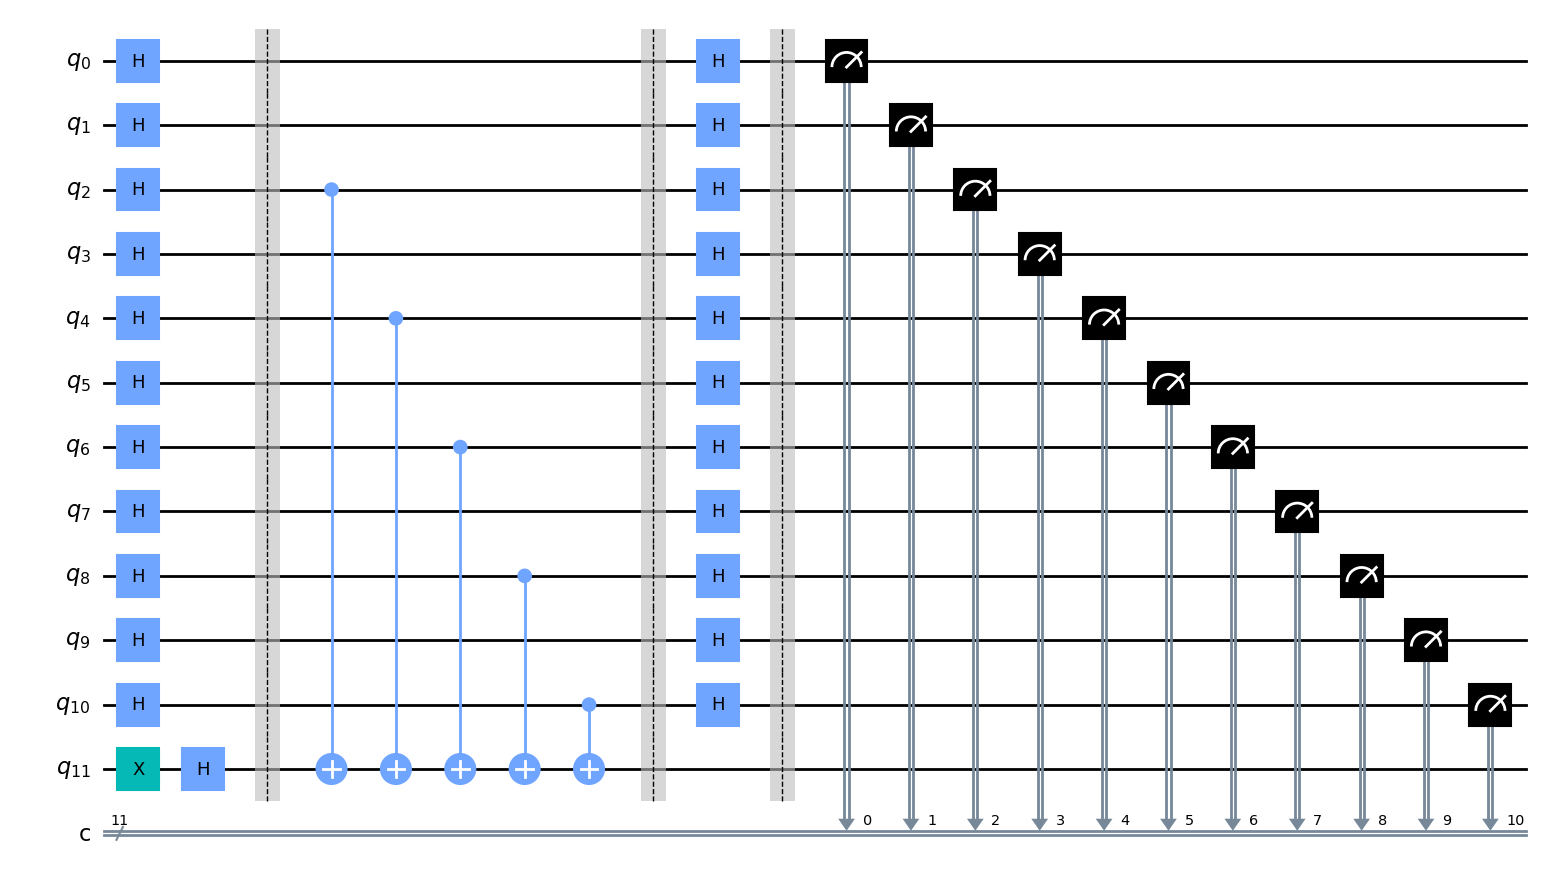

In [5]:
#Step 1: Apply H gate on all gates except the helper qubit
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber)) # If we skip this then we will get our answer 50% time, super position
circuit.h(len(secretNumber)) # If we skip this then we will get our answer 50% time, super position

circuit.barrier()
#Step 2, we need to apply cNOT gate on the qubits that will have the value 1 
#        and the unselective which is 8th Qubit 
for index, one in enumerate(secretNumber[::-1]):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

# Step 3, Measure all the qubits from 0 to len()
circuit.measure(range(len(secretNumber)),range(len(secretNumber)))
circuit.draw(output='mpl')

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10101010100': 1}


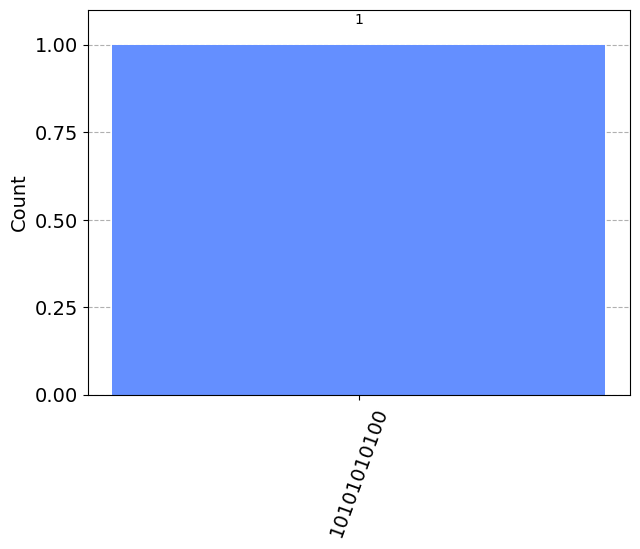

In [7]:
plot_histogram([counts])